# Example Result Vizualization

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# Reset Seaborn's style to Matplotlib defaults
mpl.rcParams.update(mpl.rcParamsDefault)

## Plotting Parameters

In [2]:
print(mpl.rcParams.keys())
mpl.rcParams.update(
    {
        "font.family": "Aptos",
        "font.size": "8",
        "axes.titlesize": "6",
        "axes.labelsize": "6",
        "xtick.labelsize": "6",
        "ytick.labelsize": "6",
        "legend.fontsize": "6",
        "axes.linewidth": .5,
        "lines.linewidth": .5,
        "xtick.major.size": 3,  # Increase major tick size for visibility
        "xtick.minor.size": 2,  # Set minor tick size
        "ytick.major.size": 3,
        "ytick.minor.size": 2,
        "xtick.major.width": 0.5,
        "ytick.major.width": 0.5,
        "xtick.minor.width": 0.3,
        "ytick.minor.width": 0.3,
        "xtick.color": "black", # Specify tick color for visibility
        "ytick.color": "black",
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",
        "legend.frameon": False,
        "axes.grid": False,  # Enable grid globally if needed
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.bottom": False,
    }
)

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

## Load Results

In [3]:
df_unit = pd.read_csv('validation_gadm_2000_2002.csv')
df_unit

,dis_no,name,admin_level,admin1,admin2,geom_type,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard
0,1999-9388-DJI,Ali Sabieh,Admin1,Ali Sabieh,NaN,gadm,geodetic,2.328416e+09,2.166967e+10,2.210484e+09,2.178760e+10,0.949351,0.102008,0.101456
1,1999-9388-DJI,Dikhil,Admin1,Dikhil,NaN,gadm,geodetic,6.690660e+09,2.166967e+10,6.276631e+09,2.208370e+10,0.938118,0.289650,0.284220
2,1999-9388-DJI,Djibouti,Admin1,Djiboutii,NaN,gadm,geodetic,1.955178e+08,2.166967e+10,1.914423e+08,2.167375e+10,0.979155,0.008835,0.008833
3,1999-9388-DJI,Obock,Admin1,Obock,NaN,gadm,geodetic,4.339481e+09,2.166967e+10,4.323173e+09,2.168598e+10,0.996242,0.199503,0.199353
4,1999-9388-DJI,Tadjourah,Admin1,Tadjoura,NaN,gadm,geodetic,6.658741e+09,2.166967e+10,6.469979e+09,2.185844e+10,0.971652,0.298573,0.295995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2002-9843-PER,San Martin,Admin1,San Martín,NaN,gadm,geodetic,5.036842e+10,1.290640e+12,5.036842e+10,1.290640e+12,1.000000,0.039026,0.039026
2827,2002-9843-PER,Tacna,Admin1,Tacna,NaN,gadm,geodetic,1.599828e+10,1.290640e+12,1.594708e+10,1.290691e+12,0.996800,0.012356,0.012355
2828,2002-9843-PER,Tumbes,Admin1,Tumbes,NaN,gadm,geodetic,4.641983e+09,1.290640e+12,4.616284e+09,1.290666e+12,0.994464,0.003577,0.003577
2829,2002-9843-PER,Ucayali,Admin1,Ucayali,NaN,gadm,geodetic,1.050779e+11,1.290640e+12,1.048136e+11,1.290904e+12,0.997484,0.081211,0.081194


In [4]:
df_dissolved = pd.read_csv('validation_gadm_2000_2002_dissolved.csv')
df_dissolved

,dis_no,name,admin_level,admin1,admin2,geom_type,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard
0,1999-9388-DJI,"['Ali Sabieh', 'Dikhil', 'Djibouti', 'Obock', ...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Ali Sabieh', 'Dikhil', 'Djiboutii', 'Obock',...","[None, None, None, None, None]",gadm,geodetic,2.021281e+10,2.166967e+10,1.947171e+10,2.241078e+10,0.963335,0.898570,0.868855
1,1999-9388-SDN,"['Northern Darfur', 'Red Sea']","['Admin1', 'Admin1']","['North Darfur', 'Red Sea']","[None, None]",gadm,geodetic,5.337433e+11,7.566663e+11,5.136116e+11,7.767980e+11,0.962282,0.678782,0.661191
2,1999-9388-SOM,"['Bay', 'Hiraan', 'Ceel Barde', 'Rab Dhuure', ...","['Admin1', 'Admin1', 'Admin2', 'Admin2', 'Admi...","['Bay', 'Hiiraan', 'Bakool', 'Bakool', 'Bakool...","[None, None, 'Ceel Barde', 'Rab Dhuure', 'Tiye...",gadm,geodetic,1.238183e+11,1.245732e+11,1.232934e+11,1.250982e+11,0.995760,0.989726,0.985573
3,2000-0002-AGO,['Baia Farta'],['Admin2'],['Benguela'],['Baía Farta'],gadm,geodetic,6.858307e+09,1.086344e+10,6.739455e+09,1.098229e+10,0.982670,0.620379,0.613666
4,2000-0003-BGD,"['Barisal', 'Chittagong', 'Dhaka', 'Khulna', '...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Barisal', 'Chittagong', 'Dhaka', 'Khulna', '...","[None, None, None, None, None, None, None]",gadm,geodetic,1.288496e+11,1.398251e+11,1.269261e+11,1.417486e+11,0.985072,0.907749,0.895431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2002-9605-BRA,"['Minas Gerais', 'Paraíba', 'Rio Grande do Nor...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Minas Gerais', 'Paraíba', 'Rio Grande do Nor...","[None, None, None, None, None]",gadm,geodetic,1.045614e+12,1.047012e+12,1.044468e+12,1.048158e+12,0.998904,0.997571,0.996480
609,2002-9611-AUS,"['Queensland', 'New South Wales']","['Admin1', 'Admin1']","['Queensland', 'New South Wales']","[None, None]",gadm,geodetic,2.530853e+12,2.530729e+12,2.530726e+12,2.530856e+12,0.999950,0.999999,0.999949
610,2002-9838-HND,"['Orocuina', 'El Corpus']","['Admin2', 'Admin2']","['Choluteca', 'Choluteca']","['Orocuina', 'El Corpus']",gadm,geodetic,3.561189e+08,5.996502e+08,3.558300e+08,5.999391e+08,0.999189,0.593396,0.593110
611,2002-9843-PER,"['Amazonas', 'Ancash', 'Apurimac', 'Arequipa',...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Amazonas', 'Ancash', 'Apurímac', 'Arequipa',...","[None, None, None, None, None, None, None, Non...",gadm,geodetic,1.289757e+12,1.290640e+12,1.285256e+12,1.295142e+12,0.996510,0.995828,0.992367


## Area Distribution

Text(0.5, 0, 'Log10 of area (km²)')

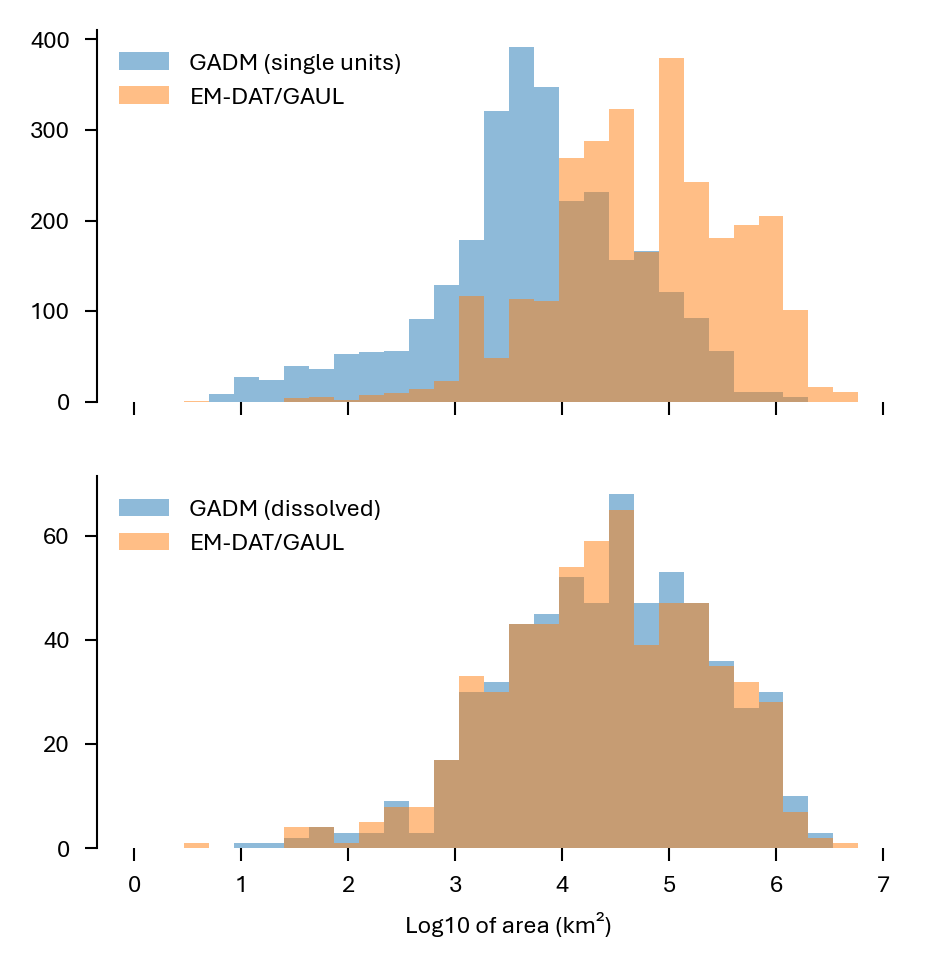

In [5]:
# Geometry size comparison
# Note: GADM are individual units, either Adm1 or Adm2
# Note: EM-DAT GAUL geometries are dissolved geometries by disno, not individual units

bins = np.linspace(0, 7, 31)

fig, axes = plt.subplots(2,1,figsize=(9/2.54,9/2.54), sharex=True, dpi=300)
_ = axes[0].hist(np.log10(df_unit['area_a']/1e6), bins=bins, label='GADM (single units)', alpha=0.5)
_ = axes[0].hist(np.log10(df_unit['area_b']/1e6), bins=bins, label='EM-DAT/GAUL', alpha=0.5)
_ = axes[1].hist(np.log10(df_dissolved['area_a']/1e6), bins=bins, label='GADM (dissolved)', alpha=0.5)
_ = axes[1].hist(np.log10(df_dissolved['area_b']/1e6), bins=bins, label='EM-DAT/GAUL', alpha=0.5)
axes[0].legend()
axes[1].legend()
axes[1].set_xlabel('Log10 of area (km²)')


## Indices Distribution

In [6]:
def format_ax(ax):
    ax.minorticks_on()
    ax.xaxis.set_major_locator(MultipleLocator(.2))
    ax.yaxis.set_major_locator(MultipleLocator(.2))
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    ax.yaxis.set_minor_locator(MultipleLocator(.1))
    ax.grid(which='both', axis='y', linestyle='-', linewidth=.3, color='lightgrey')
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['bottom'].set_position(('outward', 2))
    return ax

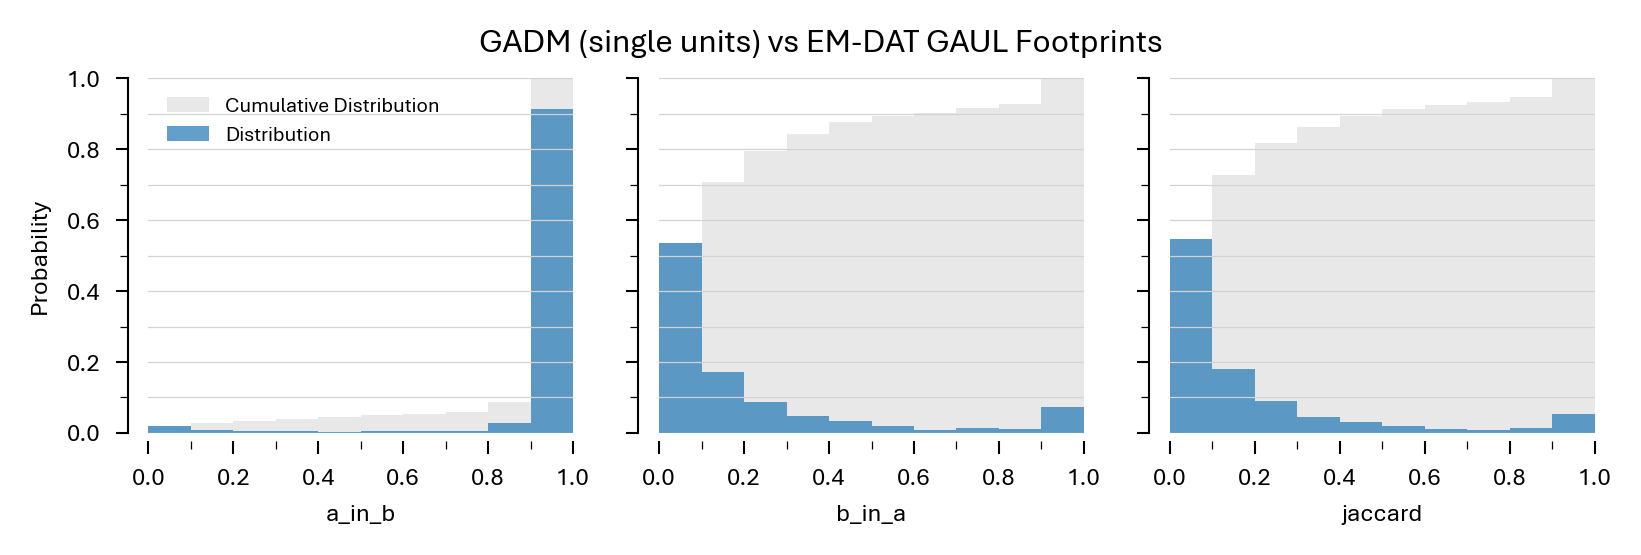

In [7]:
bins = np.linspace(0, 1, 11)

fig, axes = plt.subplots(1, 3, figsize=(14/2.54, 5/2.54), dpi=300, sharey=True, sharex=True)
sns.histplot(df_unit['a_in_b'], ax=axes[0], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", label='Cumulative Distribution', edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_unit['b_in_a'], ax=axes[1], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_unit['jaccard'], ax=axes[2], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_unit['a_in_b'], ax=axes[0], bins=bins, stat='probability', alpha=0.7, edgecolor=None, label="Distribution")
sns.histplot(df_unit['b_in_a'], ax=axes[1], bins=bins, stat='probability', alpha=0.7, edgecolor=None)
sns.histplot(df_unit['jaccard'], ax=axes[2], bins=bins, stat='probability', alpha=0.7, edgecolor=None)

axes[0].legend(fontsize=5)
axes[0].set_ylim((-0.2,1.2))

for ax in axes.ravel():
    format_ax(ax)
fig.suptitle('GADM (single units) vs EM-DAT GAUL Footprints', y=.9, fontsize=8)
fig.tight_layout()

* 'a_in_b' is the most relevant indice here
* We see that more than 90% of GADM geocoded units are at least included at 90% in EM-DAT GAUL footprints

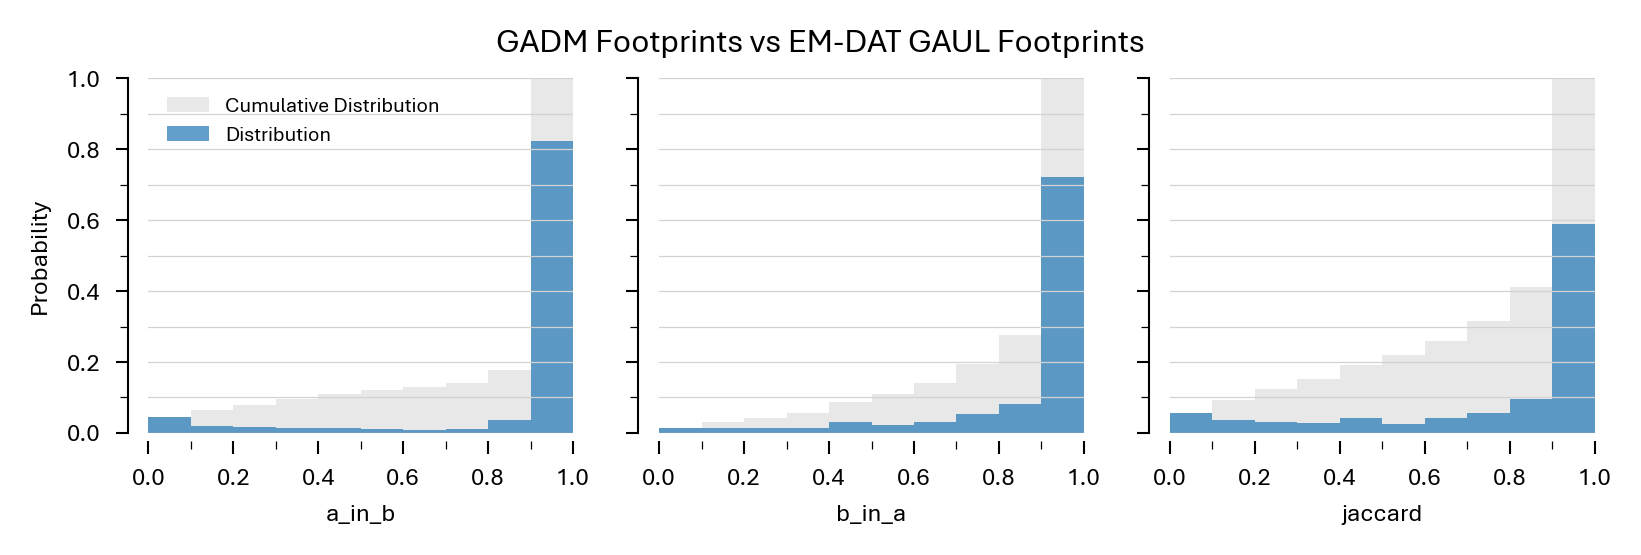

In [8]:
bins = np.linspace(0, 1, 11)

fig, axes = plt.subplots(1, 3, figsize=(14/2.54, 5/2.54), dpi=300, sharey=True, sharex=True)
sns.histplot(df_dissolved['a_in_b'], ax=axes[0], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", label='Cumulative Distribution', edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_dissolved['b_in_a'], ax=axes[1], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_dissolved['jaccard'], ax=axes[2], bins=bins, stat='probability', cumulative=True, color='lightgrey', element="step", edgecolor='None', lw=1., alpha=0.5)
sns.histplot(df_dissolved['a_in_b'], ax=axes[0], bins=bins, stat='probability', alpha=0.7, edgecolor=None, label="Distribution")
sns.histplot(df_dissolved['b_in_a'], ax=axes[1], bins=bins, stat='probability', alpha=0.7, edgecolor=None)
sns.histplot(df_dissolved['jaccard'], ax=axes[2], bins=bins, stat='probability', alpha=0.7, edgecolor=None)

axes[0].legend(fontsize=5)
axes[0].set_ylim((-0.2,1.2))

for ax in axes.ravel():
    format_ax(ax)
fig.suptitle('GADM Footprints vs EM-DAT GAUL Footprints', y=.9, fontsize=8)
fig.tight_layout()

## Units with no intersections

In [9]:
df_unit[df_unit.intersection_area == 0]

,dis_no,name,admin_level,admin1,admin2,geom_type,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard
711,2000-0775-FRA,Hauts-de-France,Admin1,Hauts-de-France,NaN,gadm,geodetic,3.198213e+10,4.269909e+09,0.0,3.625204e+10,0.0,0.0,0.0
712,2000-0775-FRA,Aisne,Admin2,Hauts-de-France,Aisne,gadm,geodetic,7.419090e+09,4.269909e+09,0.0,1.168900e+10,0.0,0.0,0.0
725,2000-0785-IND,Tiruvarur,Admin2,Tamil Nadu,Thiruvarur,gadm,geodetic,2.515216e+09,2.785128e+11,0.0,2.810280e+11,0.0,0.0,0.0
1321,2001-0454-JPN,Saga,Admin1,Saga,NaN,gadm,geodetic,2.455472e+09,2.235775e+10,0.0,2.481323e+10,0.0,0.0,0.0
2242,2002-0447-ROU,Covasna,Admin1,Covasna,NaN,gadm,geodetic,3.708614e+09,3.103708e+10,0.0,3.474569e+10,0.0,0.0,0.0
2249,2002-0447-ROU,Teleorman,Admin1,Teleorman,NaN,gadm,geodetic,5.788541e+09,3.103708e+10,0.0,3.682562e+10,0.0,0.0,0.0
2250,2002-0447-ROU,Gorj,Admin1,Gorj,NaN,gadm,geodetic,5.583726e+09,3.103708e+10,0.0,3.662081e+10,0.0,0.0,0.0
2251,2002-0447-ROU,Olt,Admin1,Olt,NaN,gadm,geodetic,5.505136e+09,3.103708e+10,0.0,3.654222e+10,0.0,0.0,0.0


In [10]:
df_dissolved[df_dissolved.intersection_area == 0]

,dis_no,name,admin_level,admin1,admin2,geom_type,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard
165,2000-0775-FRA,"['Hauts-de-France', 'Aisne']","['Admin1', 'Admin2']","['Hauts-de-France', 'Hauts-de-France']","[None, 'Aisne']",gadm,geodetic,3.198213e+10,4.269909e+09,0.0,3.625204e+10,0.0,0.0,0.0
